In [1]:
!pip install pandas nltk

In [2]:
import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("omw-1.4")


[nltk_data] Downloading package punkt to C:\Users\37382/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\37382/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\37382/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\37382/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
import nltk
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\37382/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    if not isinstance(text, str):
        return ""

    text = text.lower()
    text = re.sub(r'(http\S+|www\S+|https\S+|[@#]\w+)', '', text)
    text = re.sub(r'[“”‘’]', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    pos_tags = nltk.pos_tag(tokens)
    lemmatized = [lemmatizer.lemmatize(w, get_wordnet_pos(tag)) for w, tag in pos_tags]
    return " ".join(lemmatized)

df = pd.read_csv(r"C:\Users\37382\Desktop\chatgpt-reddit-comments.csv")
df["cleaned_comment"] = df["comment_body"].apply(clean_text)
df.to_csv("cleaned_reddit_comments.csv", index=False)
print(df[["comment_body", "cleaned_comment"]].head())

[nltk_data] Downloading package punkt to C:\Users\37382/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\37382/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\37382/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\37382/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                        comment_body  \
0  I've been shocked for days now, I don't need c...   
1   \n\nI am so angry right now. I just wasted my...   
2  chatgpt karma whoring is here folks! just when...   
3                                 Worked on me, ngl.   
4  Certified 10/10, must-see moment. It really di...   

                                     cleaned_comment  
0                  ive shock day dont need clickbait  
1  angry right wasted time read post sub clickbai...  
2  chatgpt karma whore folk think stream thought ...  
3                                           work ngl  
4           certify mustsee moment really shock core  


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=15000,
    ngram_range=(1, 2),      
    min_df=3,                
    max_df=0.9,              
    sublinear_tf=True,       
)
X = vectorizer.fit_transform(df["cleaned_comment"])

[nltk_data] Downloading package brown to C:\Users\37382/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\37382/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\37382/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\37382/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\37382/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\37382/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\37382/nltk_data...
[nltk_data]   Pack

Finished.


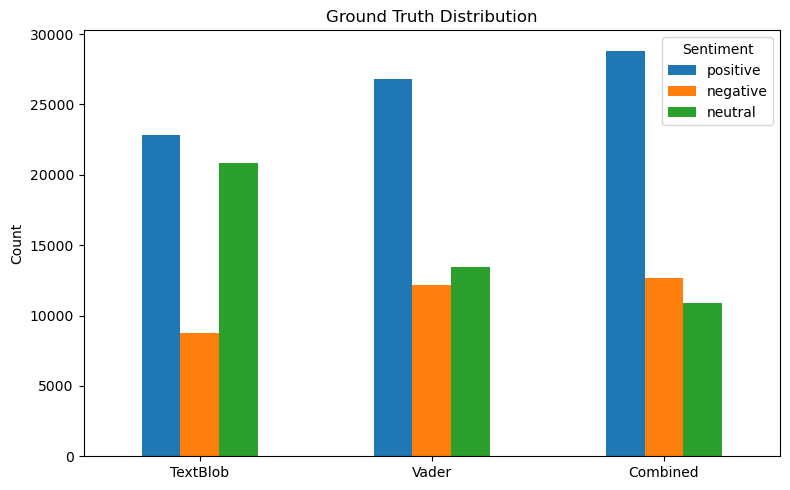

In [6]:
import sys
!{sys.executable} -m pip install textblob nltk matplotlib pandas
!{sys.executable} -m textblob.download_corpora
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("cleaned_reddit_comments.csv")

def get_textblob_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return 0
    return TextBlob(text).sentiment.polarity
df['textblob_score'] = df['cleaned_comment'].apply(get_textblob_sentiment)

sia = SentimentIntensityAnalyzer()
def get_vader_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return 0
    return sia.polarity_scores(text)['compound']
df['vader_score'] = df['cleaned_comment'].apply(get_vader_sentiment)

tb = df['textblob_score'].values
vd = df['vader_score'].values
eps = 1e-6
wt_tb = np.abs(tb) / (np.abs(tb) + np.abs(vd) + eps)
wt_vd = 1 - wt_tb
df['combined_score'] = wt_tb*tb + wt_vd*vd

def get_sentiment_label(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['textblob_label'] = df['textblob_score'].apply(get_sentiment_label)
df['vader_label'] = df['vader_score'].apply(get_sentiment_label)
df['combined_label'] = df['combined_score'].apply(get_sentiment_label)

label_counts = pd.DataFrame({
    'TextBlob': df['textblob_label'].value_counts(),
    'Vader': df['vader_label'].value_counts(),
    'Combined': df['combined_label'].value_counts()
}).fillna(0)

label_counts = label_counts.T  
label_counts = label_counts[['positive', 'negative', 'neutral']]  

ax = label_counts.plot(      
    kind='bar',
    figsize=(8, 5),
    color=['#1f77b4', '#ff7f0e', '#2ca02c']
)

ax.set_title("Ground Truth Distribution")
ax.set_ylabel("Count")
ax.set_xlabel("")
ax.legend(['positive', 'negative', 'neutral'], title='Sentiment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
plt.tight_layout()
plt.show()

df.to_csv("reddit_with_sentiment_labels.csv", index=False)


============ Classification Report ============
              precision    recall  f1-score   support

    negative       0.83      0.65      0.73      2540
     neutral       0.82      0.84      0.83      2180
    positive       0.85      0.93      0.89      5764

    accuracy                           0.84     10484
   macro avg       0.83      0.81      0.82     10484
weighted avg       0.84      0.84      0.84     10484



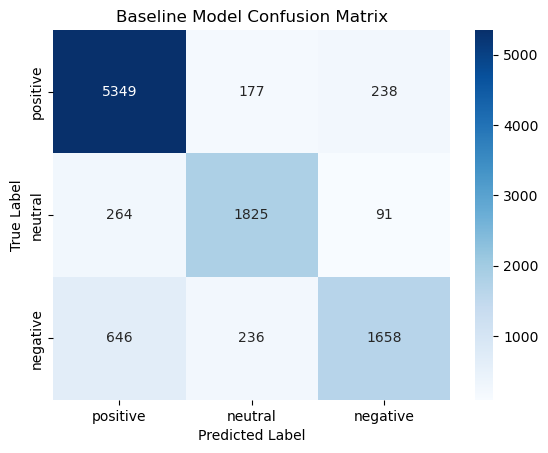

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y = df["combined_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n============ Classification Report ============")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['positive','neutral','negative'],
            yticklabels=['positive','neutral','negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Baseline Model Confusion Matrix')
plt.show()

In [8]:
!pip install xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
df["cleaned_comment"] = df["cleaned_comment"].astype(str)

df = df.dropna(subset=["cleaned_comment"])

vectorizer = TfidfVectorizer(max_features=15000, ngram_range=(1, 2), min_df=3, max_df=0.9, sublinear_tf=True)
X = vectorizer.fit_transform(df["cleaned_comment"])


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Logistic Regression - Overall Accuracy: 0.8439
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.66      0.74      2540
     neutral       0.82      0.83      0.83      2180
    positive       0.85      0.93      0.89      5764

    accuracy                           0.84     10484
   macro avg       0.84      0.81      0.82     10484
weighted avg       0.84      0.84      0.84     10484



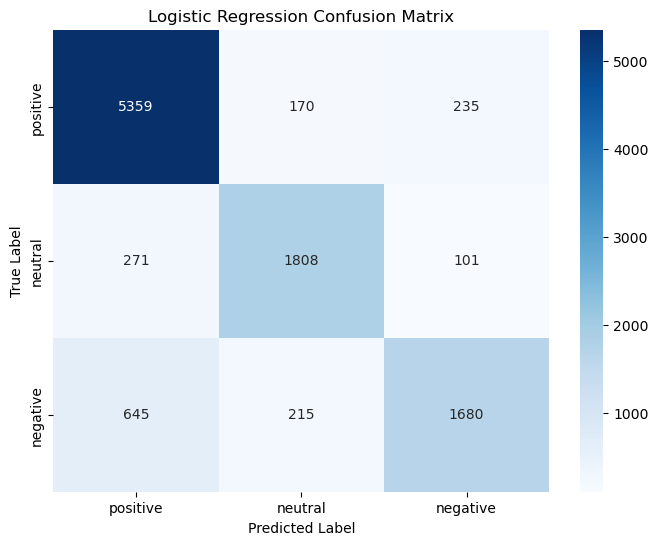

In [11]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)


accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression - Overall Accuracy: {accuracy_log_reg:.4f}")


print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['negative', 'neutral', 'positive']))


cm_log_reg = confusion_matrix(y_test, y_pred_log_reg, labels=['positive', 'neutral', 'negative'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], 
            yticklabels=['positive', 'neutral', 'negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()



LinearSVC - Overall Accuracy: 0.8385
LinearSVC - Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.71      0.75      2540
     neutral       0.79      0.82      0.80      2180
    positive       0.87      0.90      0.89      5764

    accuracy                           0.84     10484
   macro avg       0.82      0.81      0.81     10484
weighted avg       0.84      0.84      0.84     10484



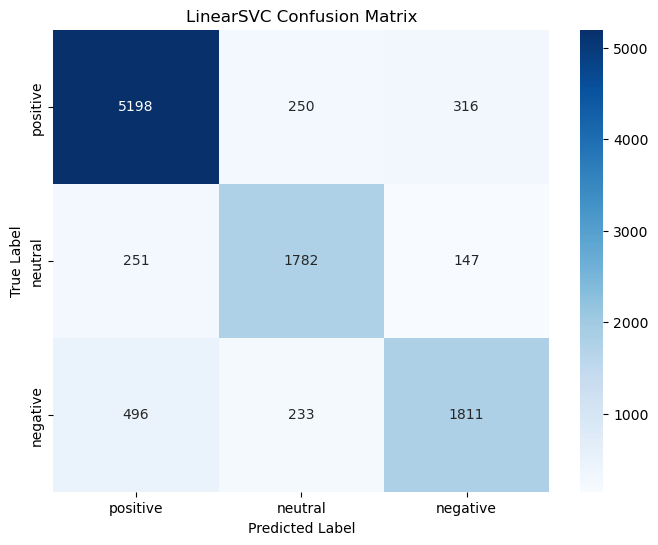

In [12]:
from sklearn.svm import LinearSVC  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


svm = LinearSVC()  
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"LinearSVC - Overall Accuracy: {accuracy_svm:.4f}")


print("LinearSVC - Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['negative', 'neutral', 'positive']))


cm_svm = confusion_matrix(y_test, y_pred_svm, labels=['positive', 'neutral', 'negative'])


plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], 
            yticklabels=['positive', 'neutral', 'negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('LinearSVC Confusion Matrix')
plt.show()


Naive Bayes - Overall Accuracy: 0.6502
Naive Bayes - Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.26      0.40      2540
     neutral       0.91      0.22      0.35      2180
    positive       0.62      0.98      0.76      5764

    accuracy                           0.65     10484
   macro avg       0.80      0.49      0.50     10484
weighted avg       0.74      0.65      0.59     10484



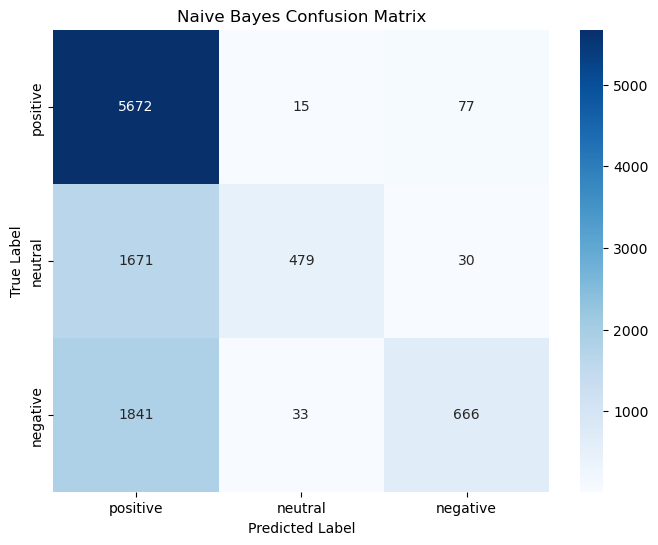

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)


accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes - Overall Accuracy: {accuracy_nb:.4f}")


print("Naive Bayes - Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=['negative', 'neutral', 'positive']))


cm_nb = confusion_matrix(y_test, y_pred_nb, labels=['positive', 'neutral', 'negative'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], 
            yticklabels=['positive', 'neutral', 'negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Naive Bayes Confusion Matrix')
plt.show()



Random Forest - Overall Accuracy: 0.7776
Random Forest - Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.36      0.51      2540
     neutral       0.85      0.79      0.82      2180
    positive       0.75      0.96      0.84      5764

    accuracy                           0.78     10484
   macro avg       0.82      0.70      0.72     10484
weighted avg       0.80      0.78      0.75     10484



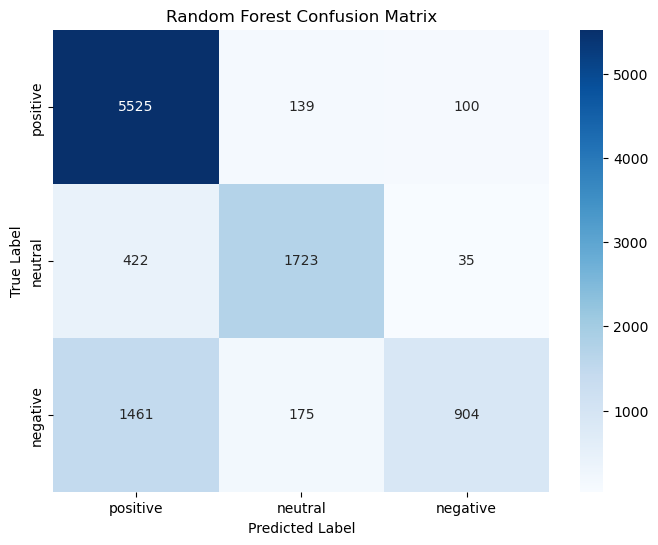

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest - Overall Accuracy: {accuracy_rf:.4f}")


print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['negative', 'neutral', 'positive']))


cm_rf = confusion_matrix(y_test, y_pred_rf, labels=['positive', 'neutral', 'negative'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], 
            yticklabels=['positive', 'neutral', 'negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()



XGBoost - Overall Accuracy: 0.7998
XGBoost - Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.52      0.64      2540
     neutral       0.73      0.85      0.79      2180
    positive       0.82      0.90      0.86      5764

    accuracy                           0.80     10484
   macro avg       0.79      0.76      0.76     10484
weighted avg       0.80      0.80      0.79     10484



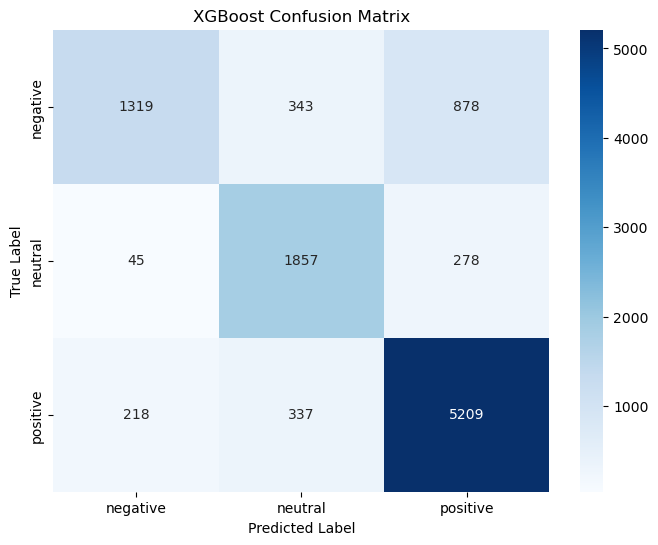

In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  
y_test_encoded = label_encoder.transform(y_test)  


xgb = XGBClassifier()
xgb.fit(X_train, y_train_encoded)
y_pred_xgb = xgb.predict(X_test)


accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print(f"XGBoost - Overall Accuracy: {accuracy_xgb:.4f}")


print("XGBoost - Classification Report:")
print(classification_report(y_test_encoded, y_pred_xgb, target_names=label_encoder.classes_))


cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb, labels=[0, 1, 2])  


plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Confusion Matrix')
plt.show()



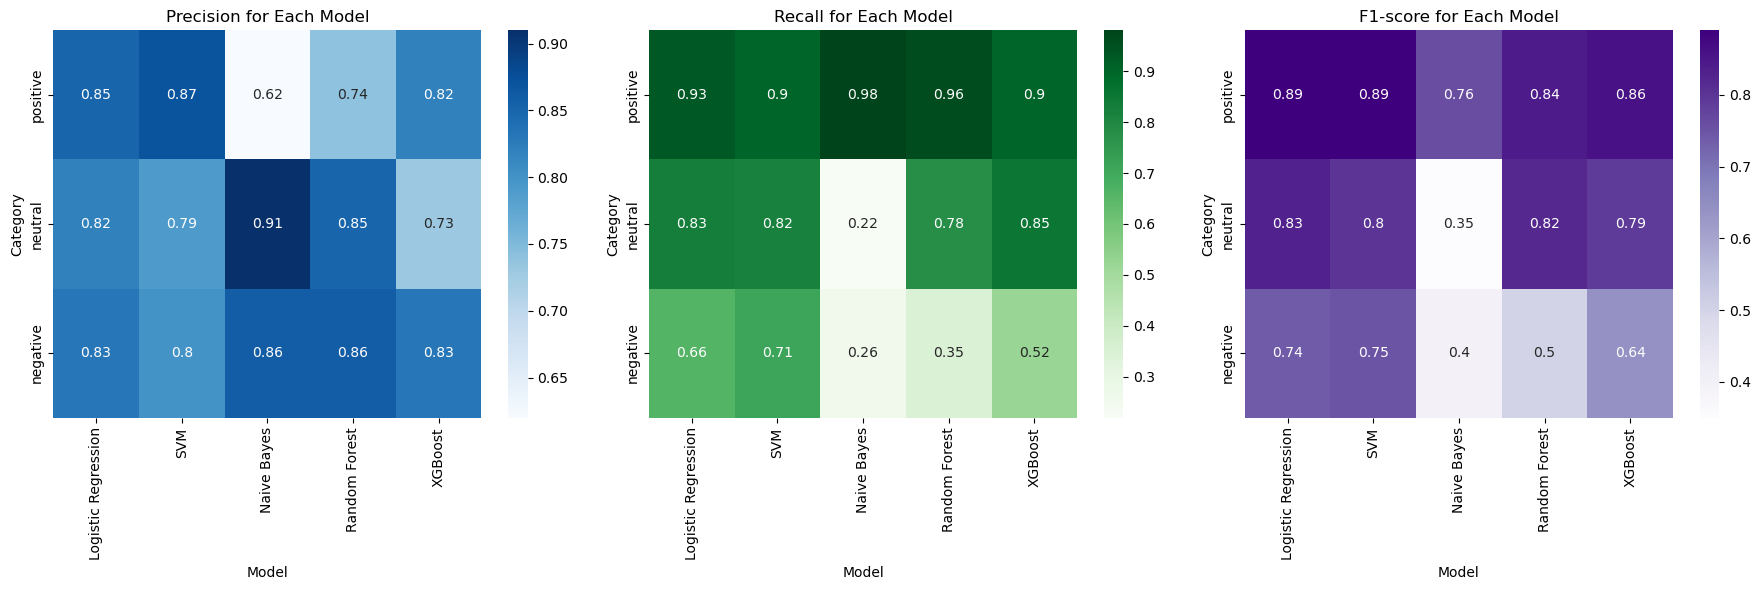

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


model_names = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest', 'XGBoost']


precisions = {
    'Logistic Regression': [0.85, 0.82, 0.83],  
    'SVM': [0.87, 0.79, 0.80],
    'Naive Bayes': [0.62, 0.91, 0.86],
    'Random Forest': [0.74, 0.85, 0.86],
    'XGBoost': [0.82, 0.73, 0.83]
}

recalls = {
    'Logistic Regression': [0.93, 0.83, 0.66],
    'SVM': [0.90, 0.82, 0.71],
    'Naive Bayes': [0.98, 0.22, 0.26],
    'Random Forest': [0.96, 0.78, 0.35],
    'XGBoost': [0.90, 0.85, 0.52]
}

f1_scores = {
    'Logistic Regression': [0.89, 0.83, 0.74],
    'SVM': [0.89, 0.80, 0.75],
    'Naive Bayes': [0.76, 0.35, 0.40],
    'Random Forest': [0.84, 0.82, 0.50],
    'XGBoost': [0.86, 0.79, 0.64]
}


precision_df = pd.DataFrame(precisions, index=['positive', 'neutral', 'negative'])
recall_df = pd.DataFrame(recalls, index=['positive', 'neutral', 'negative'])
f1_df = pd.DataFrame(f1_scores, index=['positive', 'neutral', 'negative'])


fig, axes = plt.subplots(1, 3, figsize=(18, 6))  


sns.heatmap(precision_df, annot=True, cmap='Blues', ax=axes[0], cbar=True)
axes[0].set_title('Precision for Each Model')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Category')


sns.heatmap(recall_df, annot=True, cmap='Greens', ax=axes[1], cbar=True)
axes[1].set_title('Recall for Each Model')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Category')


sns.heatmap(f1_df, annot=True, cmap='Purples', ax=axes[2], cbar=True)
axes[2].set_title('F1-score for Each Model')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('Category')


plt.tight_layout()
plt.show()



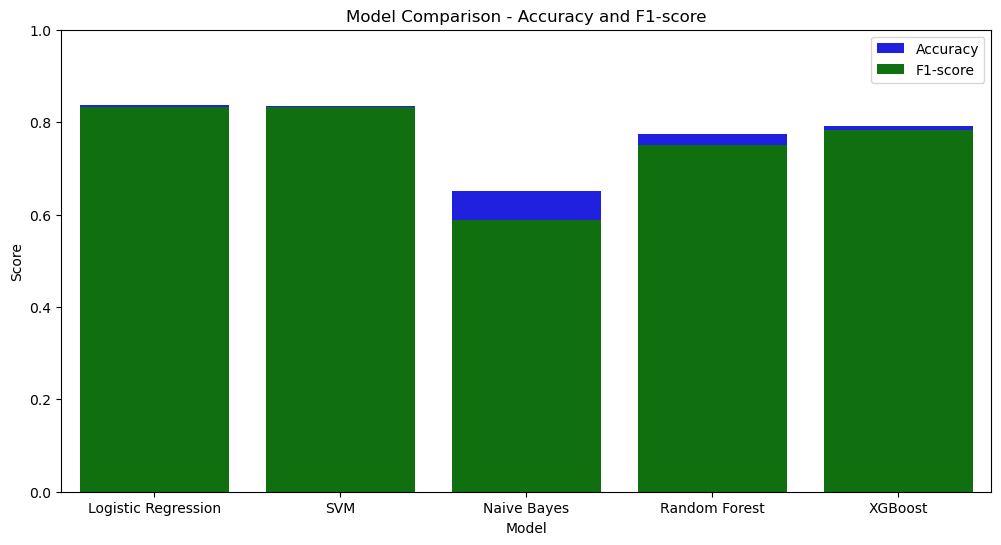

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC  
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
y = y.map(label_mapping)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(),  
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}


model_names = []
accuracies = []
f1_scores = []


for model_name, model in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
   
    accuracy = accuracy_score(y_test, y_pred)
    f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    
   
    model_names.append(model_name)
    accuracies.append(accuracy)
    f1_scores.append(f1)


df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'F1-score': f1_scores
})


plt.figure(figsize=(12, 6))


sns.barplot(x='Model', y='Accuracy', data=df, color='blue', label='Accuracy')
sns.barplot(x='Model', y='F1-score', data=df, color='green', label='F1-score')


plt.title('Model Comparison - Accuracy and F1-score')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)  
plt.legend()


plt.show()




Logistic Regression Accuracy: 0.8531095001907669
Logistic Regression F1 (macro): 0.830358757798834

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.70      0.76      2540
     neutral       0.83      0.85      0.84      2180
    positive       0.87      0.92      0.90      5764

    accuracy                           0.85     10484
   macro avg       0.84      0.82      0.83     10484
weighted avg       0.85      0.85      0.85     10484


Calibrated LinearSVC Accuracy: 0.8496756962991224
Calibrated LinearSVC F1 (macro): 0.8269662507547086

Calibrated LinearSVC Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.70      0.76      2540
     neutral       0.83      0.83      0.83      2180
    positive       0.87      0.92      0.89      5764

    accuracy                           0.85     10484
   macro avg       0.84      0.82      0.83     10484
we

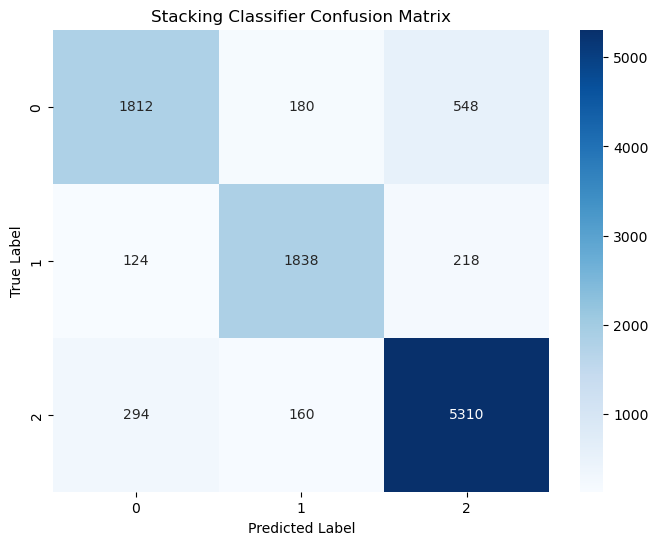

In [18]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


df_raw = pd.read_csv("reddit_with_sentiment_labels.csv")   

TEXT_COL  = "cleaned_comment"         
LABEL_COL = "combined_label"

df_raw[TEXT_COL] = df_raw[TEXT_COL].astype(str)


df_raw = df_raw.dropna(subset=[TEXT_COL])


X_text = df_raw[TEXT_COL]
y      = df_raw[LABEL_COL]


vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.9,
    sublinear_tf=True
)

X = vectorizer.fit_transform(X_text)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


log_reg = LogisticRegression(max_iter=1000, C=1.7)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_log)
f1_log  = f1_score(y_test, y_pred_log, average='macro')

print("Logistic Regression Accuracy:", acc_log)
print("Logistic Regression F1 (macro):", f1_log)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))


base_svc = LinearSVC()
calib_svc = CalibratedClassifierCV(base_svc, method='sigmoid', cv=3)

calib_svc.fit(X_train, y_train)
y_pred_svc = calib_svc.predict(X_test)

acc_svc = accuracy_score(y_test, y_pred_svc)
f1_svc  = f1_score(y_test, y_pred_svc, average='macro')

print("\nCalibrated LinearSVC Accuracy:", acc_svc)
print("Calibrated LinearSVC F1 (macro):", f1_svc)
print("\nCalibrated LinearSVC Classification Report:")
print(classification_report(y_test, y_pred_svc))


base_estimators = [
    ("log_reg", LogisticRegression(max_iter=1000, C=1.7)),
    ("svc", CalibratedClassifierCV(LinearSVC(), method='sigmoid', cv=3))
]

stack_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(max_iter=1000, C=1.7),
    stack_method="predict_proba",    
    n_jobs=-1
)

stack_clf.fit(X_train, y_train)
y_pred_stack = stack_clf.predict(X_test)

acc_stack = accuracy_score(y_test, y_pred_stack)
f1_stack  = f1_score(y_test, y_pred_stack, average='macro')

print("\nStacking (LogReg + LinearSVC) Accuracy:", acc_stack)
print("Stacking F1 (macro):", f1_stack)
print("\nStacking Classification Report:")
print(classification_report(y_test, y_pred_stack))


model_names = ["Logistic Regression", "Calibrated LinearSVC", "Stacking(LogReg+LinearSVC)"]
accuracies  = [acc_log, acc_svc, acc_stack]
f1_scores   = [f1_log, f1_svc, f1_stack]

results_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "F1-score": f1_scores
})

print("\nSummary:")
print(results_df)


cm = confusion_matrix(y_test, y_pred_stack)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Stacking Classifier Confusion Matrix")
plt.show()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7808 - loss: 0.5689 - val_accuracy: 0.8585 - val_loss: 0.3879 - learning_rate: 0.0010
Epoch 2/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 46s 79ms/step - accuracy: 0.9042 - loss: 0.2962 - val_accuracy: 0.8732 - val_loss: 0.3701 - learning_rate: 0.0010
Epoch 3/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 48s 82ms/step - accuracy: 0.9311 - loss: 0.2034 - val_accuracy: 0.8701 - val_loss: 0.4064 - learning_rate: 0.0010
Epoch 4/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 48s 82ms/step - accuracy: 0.9477 - loss: 0.1512 - val_accuracy: 0.8716 - val_loss: 0.4698 - learning_rate: 0.0010
Epoch 5/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 48s 82ms/step - accuracy: 0.9655 - loss: 0.0960 - val_accuracy: 0.8723 - val_loss: 0.5317 - learning_rate: 5.0000e-04

Evaluating on test set...
Deep Learning Test Accuracy: 0.875109

Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.81      0.80      2540
     neutral       0.95     

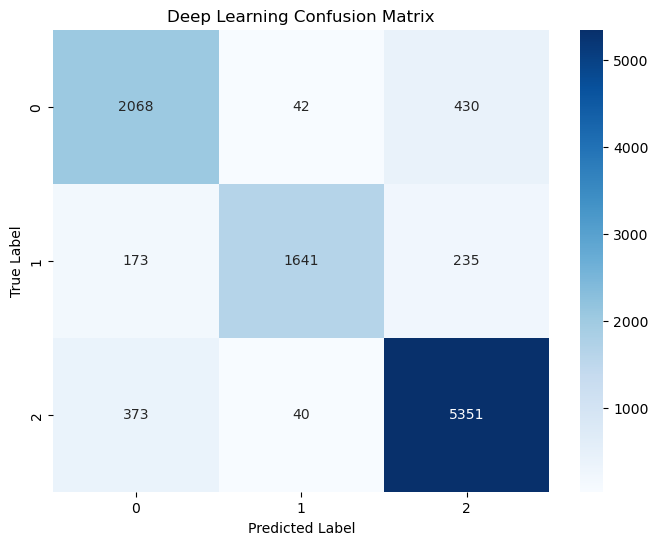

In [19]:
import os
import random
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM
from tensorflow.keras.layers import GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


DATA_PATH = "reddit_with_sentiment_labels.csv"      
TEXT_COL = "cleaned_comment"     
LABEL_COL = "combined_label"             

df_raw = pd.read_csv(DATA_PATH)


df_raw = df_raw.dropna(subset=[TEXT_COL, LABEL_COL])

texts = df_raw[TEXT_COL].astype(str).tolist()
labels = df_raw[LABEL_COL].astype(str).tolist()


le = LabelEncoder()
y = le.fit_transform(labels)
num_classes = len(le.classes_)   


max_words = 30000   
max_len = 80        

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_len, padding="post", truncating="post")


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=SEED, 
    stratify=y
)


embedding_dim = 128

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim),  
    Bidirectional(LSTM(128, return_sequences=True)),
    GlobalMaxPooling1D(),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["accuracy"]
)

model.summary()


early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=2,
    min_lr=1e-5
)


history = model.fit(
    X_train,
    y_train,
    epochs=10,           
    batch_size=64,       
    validation_split=0.1,
    callbacks=[early_stop, reduce_lr],
    verbose=1,
    shuffle=True        
)


print("\nEvaluating on test set...")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Deep Learning Test Accuracy: {test_acc:.6f}")

y_prob = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_prob, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Deep Learning Confusion Matrix")
plt.show()

